In [ ]:
"""
ДЗ 1. Блок 3. Основы статистики.

Статистика  (Сделать ДО линейной регрессии)
курс Статистика Яндекс. Прикладной анализ данных в социальных науках.

1. Заметки, эксперименты и выполнение кода при чтении глав 1-9
2. Код заданий.
"""

1. Заметки, эксперименты и выполнение кода при чтении глав 1-9

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.multivariate.factor import Factor


# fmt: off
# isort: skip_file        
# pyupgrade: disable      
# pylint: skip-file       
# flake8: noqa           
# mypy: ignore-errors     
# codespell: disable

In [ ]:
# 1. 1. Введение
# Про хранение информации

# 5. Визуализация
# Предпосылки T-теста:
#   Независимые наблюдения: Данные в одной группе не должны зависеть от данных в другой группе.
#   Приблизительно нормальное распределение: Данные в каждой группе должны быть приблизительно нормально распределены. T-тест достаточно устойчив к небольшим отклонениям от нормальности, особенно при больших размерах выборки.
#   Однородность дисперсий (для стандартного T-теста): Дисперсии двух групп должны быть примерно равны. Если они не равны, используется поправка Уэлча (Welch's t-test)
# 2.3 Доверительный интервал
# 2. 2.3 Меры центральности
# Мода МО Медиана
# 2. 2.2 ЦПТ
# 2. 2.2 Прямые распределения

# 9. Определение исследовательских гипотез
# 8. Подготовка данных
# 6. Факторный анализ
# Изменить тип переменных

# Хи-квадрат

word = "Привет"

print("utf-8")
binary_utf8 = " ".join(f"{byte:08b}" for byte in word.encode("utf-8"))
print(binary_utf8)

print("")
print("utf-16-le")
binary_utf16 = " ".join(f"{byte:08b}" for byte in word.encode("utf-16-le"))
print(binary_utf16)

utf-8
11010000 10011111 11010001 10000000 11010000 10111000 11010000 10110010 11010000 10110101 11010001 10000010

utf-16-le
00011111 00000100 01000000 00000100 00111000 00000100 00110010 00000100 00110101 00000100 01000010 00000100


/tmp/ipykernel_680893/2262016126.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Возрастная группа')['Рост'].mean().plot(kind='bar', color='lightgreen', edgecolor='black')


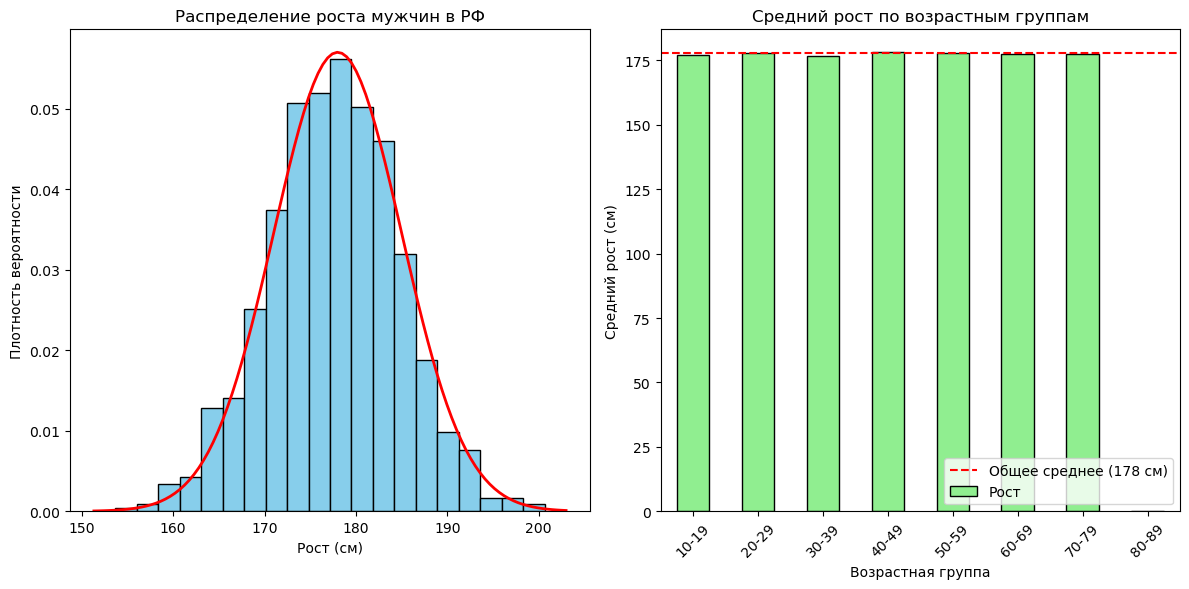

In [7]:
# Параметры нормального распределения роста для мужчин в РФ
mean_height = 178  # средний рост (см)
std_height = 7  # стандартное отклонение (см)
sample_size = 1000  # размер выборки

# Генерация данных роста
heights = np.random.normal(mean_height, std_height, sample_size)

# Генерация возрастов (от 18 до 80 лет)
ages = np.random.randint(18, 81, size=sample_size)

# Создание DataFrame
data = pd.DataFrame({"Возраст": ages, "Рост": heights})

# Разбиение на возрастные группы по десятилетиям
data["Возрастная группа"] = pd.cut(
    data["Возраст"],
    bins=range(10, 91, 10),
    labels=["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"],
)

# Построение гистограммы
plt.figure(figsize=(12, 6))

# Гистограмма распределения роста
plt.subplot(1, 2, 1)
plt.hist(data["Рост"], bins=20, color="skyblue", edgecolor="black", density=True)
plt.title("Распределение роста мужчин в РФ")
plt.xlabel("Рост (см)")
plt.ylabel("Плотность вероятности")

# Наложение теоретической кривой нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_height, std_height)
plt.plot(x, p, "r", linewidth=2)

# Гистограмма по возрастным группам
plt.subplot(1, 2, 2)
data.groupby("Возрастная группа")["Рост"].mean().plot(
    kind="bar", color="lightgreen", edgecolor="black"
)
plt.title("Средний рост по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Средний рост (см)")
plt.xticks(rotation=45)
plt.axhline(
    y=mean_height, color="r", linestyle="--", label=f"Общее среднее ({mean_height} см)"
)
plt.legend()

plt.tight_layout()
plt.show()

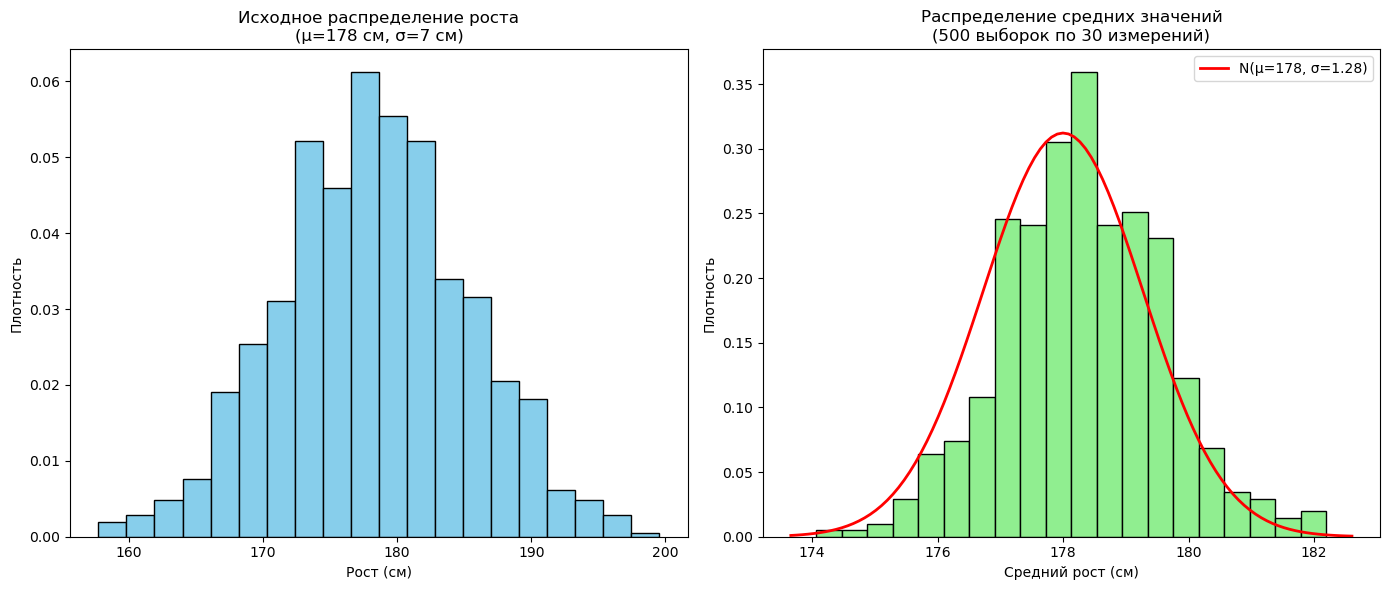

Среднее выборочных средних: 178.33 см
Стандартное отклонение выборочных средних: 1.28 см
Теоретическая стандартная ошибка (σ/√n): 1.28 см


In [8]:
# Параметры генерации данных
mean_height = 178  # средний рост (см)
std_height = 7  # стандартное отклонение (см)
sample_size = 1000  # общее количество измерений
n_samples = 500  # количество выборок для ЦПТ
sample_n = 30  # размер каждой выборки

# Генерация данных
np.random.seed(42)
ages = np.random.randint(18, 81, size=sample_size)
heights = np.random.normal(mean_height, std_height, sample_size)

# Создание DataFrame
data = pd.DataFrame({"Возраст": ages, "Рост": heights})
data["Возрастная группа"] = pd.cut(
    data["Возраст"],
    bins=range(10, 91, 10),
    labels=[f"{i}-{i+9}" for i in range(10, 90, 10)],
)

# ЦПТ: выборка средних значений по возрастным группам
sample_means = []
for _ in range(n_samples):
    sample = data.sample(sample_n)
    sample_means.append(sample["Рост"].mean())

# Построение графиков
plt.figure(figsize=(14, 6))

# 1. Исходное распределение роста
plt.subplot(1, 2, 1)
plt.hist(data["Рост"], bins=20, color="skyblue", edgecolor="black", density=True)
plt.title("Исходное распределение роста\n(μ=178 см, σ=7 см)")
plt.xlabel("Рост (см)")
plt.ylabel("Плотность")

# 2. Распределение выборочных средних (ЦПТ)
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=20, color="lightgreen", edgecolor="black", density=True)
plt.title(
    f"Распределение средних значений\n({n_samples} выборок по {sample_n} измерений)"
)
plt.xlabel("Средний рост (см)")
plt.ylabel("Плотность")

# Теоретическая нормальная кривая для ЦПТ
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
theoretical_std = std_height / np.sqrt(sample_n)  # Стандартная ошибка среднего
p = norm.pdf(x, mean_height, theoretical_std)
plt.plot(x, p, "r-", linewidth=2, label=f"N(μ={mean_height}, σ={theoretical_std:.2f})")
plt.legend()

plt.tight_layout()
plt.show()

# Вывод параметров
print(f"Среднее выборочных средних: {np.mean(sample_means):.2f} см")
print(f"Стандартное отклонение выборочных средних: {np.std(sample_means):.2f} см")
print(f"Теоретическая стандартная ошибка (σ/√n): {theoretical_std:.2f} см")

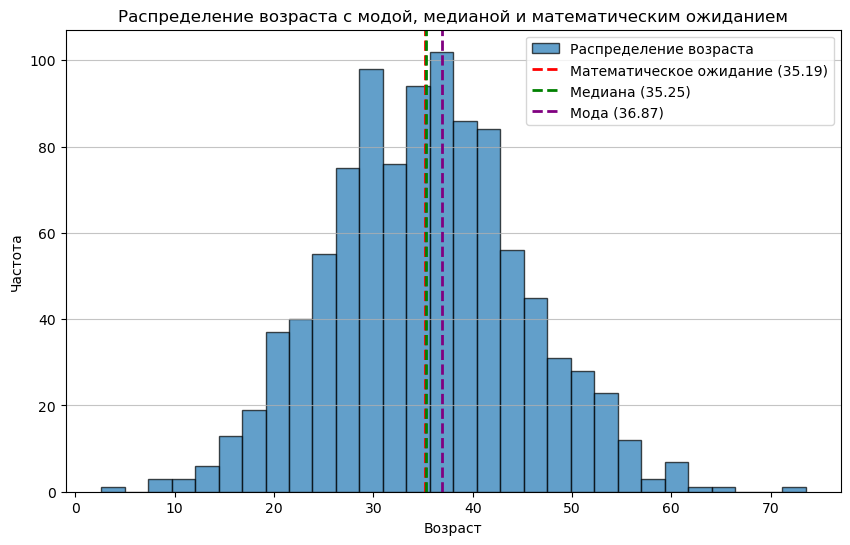

In [9]:
# 1. Генерация случайных данных для примера (предположим, это возраст)
# В реальной ситуации вы будете использовать свои данные
np.random.seed(42)  # Для воспроизводимости результатов
ages = np.random.normal(
    loc=35, scale=10, size=1000
)  # Распределение ср. 35, стд.откл. 10
ages = ages[ages >= 0]  # Убираем отрицательные значения возраста, если они появились

# 2. Расчет статистических показателей
mean_age = np.mean(ages)  # Математическое ожидание (среднее арифметическое)
median_age = np.median(ages)  # Медиана

# Мода: Для непрерывных данных, таких как возраст, мода не всегда очевидна как один пик.
# Здесь мы найдем моду, основываясь на бинах гистограммы.
# Можно также использовать scipy.stats.mode, но для распределений, как возраст,
# где значения могут быть дробными, гистограмма и ее максимумы более информативны.
hist, bin_edges = np.histogram(ages, bins=30)
mode_index = np.argmax(hist)
mode_age = (bin_edges[mode_index] + bin_edges[mode_index + 1]) / 2

# 3. Построение гистограммы и линий
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=30, edgecolor="black", alpha=0.7, label="Распределение возраста")

# Добавление пунктирных линий
plt.axvline(
    mean_age,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Математическое ожидание ({mean_age:.2f})",
)
plt.axvline(
    median_age,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Медиана ({median_age:.2f})",
)
plt.axvline(
    mode_age,
    color="purple",
    linestyle="--",
    linewidth=2,
    label=f"Мода ({mode_age:.2f})",
)


# 4. Настройка графика
plt.title("Распределение возраста с модой, медианой и математическим ожиданием")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.show()

Средний возраст выборки: 35.06
Стандартное отклонение выборки: 9.96
95% Интервал, в который попадает большинство возраста: (15.53, 54.58)


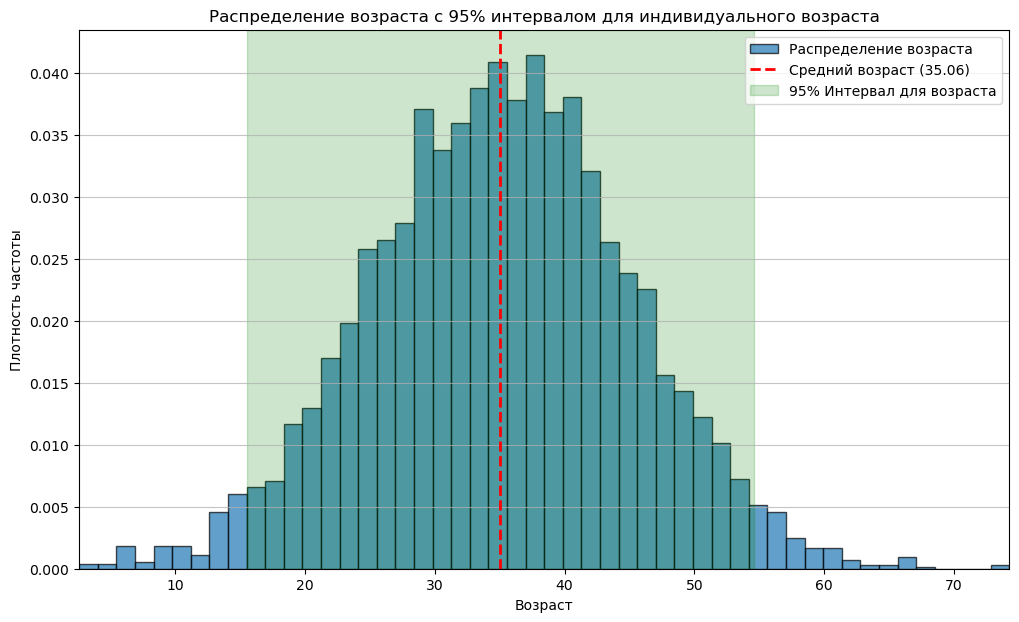

In [11]:
# 1. Генерация случайных данных для примера (предположим, это возраст)
np.random.seed(42)  # Для воспроизводимости результатов
# Генерируем данные, которые более точно соответствуют нормальному распределению
# для более четкой иллюстрации интервала предсказания
mean_true_age = 35
std_dev_true_age = 10
ages = np.random.normal(loc=mean_true_age, scale=std_dev_true_age, size=5000)
ages = ages[ages >= 0]  # Убираем отрицательные значения возраста

# 2. Расчет статистических показателей для выборки
sample_mean = np.mean(ages)
sample_std_dev = np.std(ages)  # Стандартное отклонение выборки

# 3. Расчет 95% интервала предсказания для индивидуального наблюдения
# Для нормального распределения 95% данных находятся в пределах +/- 1.96 стандартных отклонений от среднего.
# Для более точного значения, особенно для небольших выборок, можно использовать t-распределение,
# но для больших выборок (как здесь) и общего представления 1.96 является хорошим приближением.
# Z-значение для 95% (двухсторонний)
z_score_95 = stats.norm.ppf(
    0.975
)  # Получаем Z-значение, которое отсекает 2.5% в каждом хвосте

prediction_interval_lower = sample_mean - z_score_95 * sample_std_dev
prediction_interval_upper = sample_mean + z_score_95 * sample_std_dev

print(f"Средний возраст выборки: {sample_mean:.2f}")
print(f"Стандартное отклонение выборки: {sample_std_dev:.2f}")
print(
    f"95% Интервал, в который попадает большинство возраста: ({prediction_interval_lower:.2f}, {prediction_interval_upper:.2f})"
)

# 4. Построение гистограммы и выделение интервала
plt.figure(figsize=(12, 7))

# Гистограмма распределения возраста
# Увеличим количество бинов для более гладкой гистограммы
plt.hist(
    ages,
    bins=50,
    edgecolor="black",
    alpha=0.7,
    label="Распределение возраста",
    density=True,
)

# Отметка среднего значения
plt.axvline(
    sample_mean,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Средний возраст ({sample_mean:.2f})",
)

# Выделение 95% интервала как затененной области
# Проверяем, чтобы границы интервала не выходили за пределы минимального/максимального возраста в данных
# Это важно, так как интервал может включать отрицательные значения, если данные обрезаны.
display_lower_bound = max(
    0, prediction_interval_lower
)  # Возраст не может быть отрицательным
display_upper_bound = prediction_interval_upper

plt.axvspan(
    display_lower_bound,
    display_upper_bound,
    color="green",
    alpha=0.2,
    label=f"95% Интервал для возраста",
)


# 5. Настройка графика
plt.title("Распределение возраста с 95% интервалом для индивидуального возраста")
plt.xlabel("Возраст")
plt.ylabel("Плотность частоты")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.xlim(min(ages), max(ages))  # Ограничить оси X пределами данных
plt.show()

--- Вариант 1: Математическое ожидание корма ЗНАЧИТЕЛЬНО отличается ---
Среднее количество корма для кошек: 494.81 г
Среднее количество корма для собак: 605.35 г


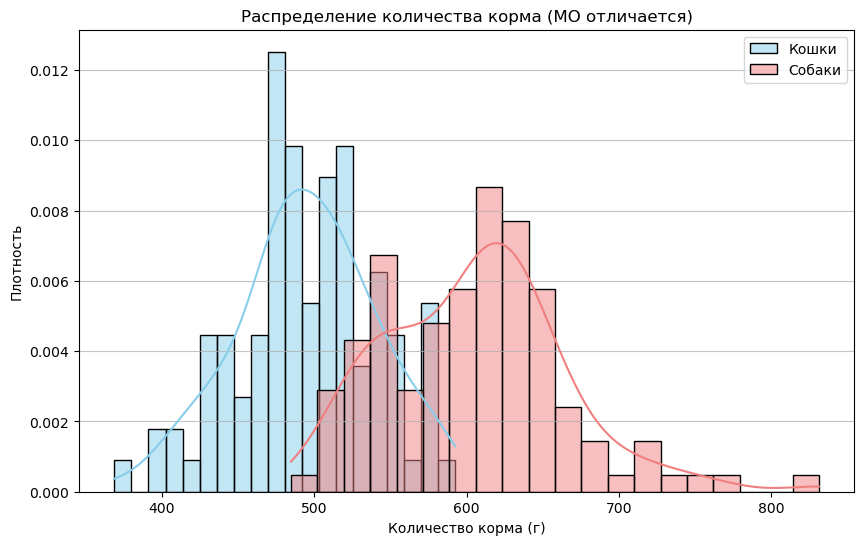


Результаты T-теста (МО отличается):
T-статистика: -15.703
P-значение: 1.296e-37
P-значение (1.296e-37) меньше уровня значимости (0.05).
Отвергаем нулевую гипотезу: существует статистически значимая разница в среднем количестве корма между кошками и собаками.




In [12]:
# 3. Базовые статистические тесты
# Статистическим тестам. Это строгое математическое правило, по которому принимается или отвергается статистическая гипотеза

# T-test
# Применяется: когда нужно понять, есть ли различия в среднем значении переменной между двумя группами наблюдений.
# Данные: должны состоять из двух переменных — по одной переменной они делятся на две группы, по другой — сравниваются между собой
# Нулевая гипотеза: средние значения переменной в двух группах не отличаются значимо


print("--- Вариант 1: Математическое ожидание корма ЗНАЧИТЕЛЬНО отличается ---")

# 1. Генерация данных: МО корма отличается
np.random.seed(42)  # Для воспроизводимости результатов

# Данные для кошек: среднее 500г, стандартное отклонение 50г
cats_food = np.random.normal(loc=500, scale=50, size=100)
cats_food = cats_food[cats_food > 0]  # Убедимся, что нет отрицательных значений

# Данные для собак: среднее 600г, стандартное отклонение 60г (намеренно выше)
dogs_food = np.random.normal(loc=600, scale=60, size=120)
dogs_food = dogs_food[dogs_food > 0]  # Убедимся, что нет отрицательных значений

print(f"Среднее количество корма для кошек: {np.mean(cats_food):.2f} г")
print(f"Среднее количество корма для собак: {np.mean(dogs_food):.2f} г")

# 2. Визуализация распределений
plt.figure(figsize=(10, 6))
sns.histplot(
    cats_food, color="skyblue", label="Кошки", kde=True, stat="density", bins=20
)
sns.histplot(
    dogs_food, color="lightcoral", label="Собаки", kde=True, stat="density", bins=20
)
plt.title("Распределение количества корма (МО отличается)")
plt.xlabel("Количество корма (г)")
plt.ylabel("Плотность")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.show()


# 3. Проведение T-теста
# H0 (Нулевая гипотеза): Среднее количество корма для кошек = Среднее количество корма для собак
# H1 (Альтернативная гипотеза): Среднее количество корма для кошек != Среднее количество корма для собак
# equal_var=False указывает на использование поправки Уэлча, которая не предполагает равенства дисперсий.
# Это часто более безопасный выбор, если вы не уверены в равенстве дисперсий.
t_stat, p_value = stats.ttest_ind(cats_food, dogs_food, equal_var=False)

print(f"\nРезультаты T-теста (МО отличается):")
print(f"T-статистика: {t_stat:.3f}")
print(
    f"P-значение: {p_value:.3e}"
)  # Используем экспоненциальную запись для маленьких чисел

# 4. Интерпретация результатов
alpha = 0.05  # Уровень значимости (обычно 0.05)

if p_value < alpha:
    print(f"P-значение ({p_value:.3e}) меньше уровня значимости ({alpha}).")
    print(
        "Отвергаем нулевую гипотезу: существует статистически значимая разница в среднем количестве корма между кошками и собаками."
    )
else:
    print(f"P-значение ({p_value:.3f}) больше или равно уровню значимости ({alpha}).")
    print(
        "Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств статистически значимой разницы."
    )

print("\n" + "=" * 80 + "\n")

In [14]:
# 4. Категориальные данные


stats.chisquare([20, 30, 50, 25], f_exp=[28, 22, 42, 33])

# P-value составляет меньше 0.05, поэтому мы можем отвергнуть нулевую гипотезу и приходим к выводу,
# что между группами людей, занимающихся гимнастикой и нет, есть статистически значимые различий по уровню головной боли

Power_divergenceResult(statistic=8.658008658008658, pvalue=0.0342009767864908)

In [21]:
children = pd.DataFrame(
    {
        "name": ["Roman", "Anna", "Dmitry"],
        "weight": [3400, 3500, 2900],
        "gender": ["male", "female", "male"],
    },
    dtype="object",
)

print(children)

print()
print(children.dtypes)

     name weight  gender
0   Roman   3400    male
1    Anna   3500  female
2  Dmitry   2900    male

name      object
weight    object
gender    object
dtype: object


In [18]:
children["gender"].astype("category")

0      male
1    female
2      male
Name: gender, dtype: category
Categories (2, object): ['female', 'male']

In [20]:
children["gender"].replace(["male", "female"], [0, 1], inplace=True)

children

,name,weight,gender
0,Roman,3400,0
1,Anna,3500,1
2,Dmitry,2900,0


--- Box plot для 4 групп по росту ---


/tmp/ipykernel_680893/2069368400.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Группа', y='Рост', data=data_height, palette='viridis')
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get

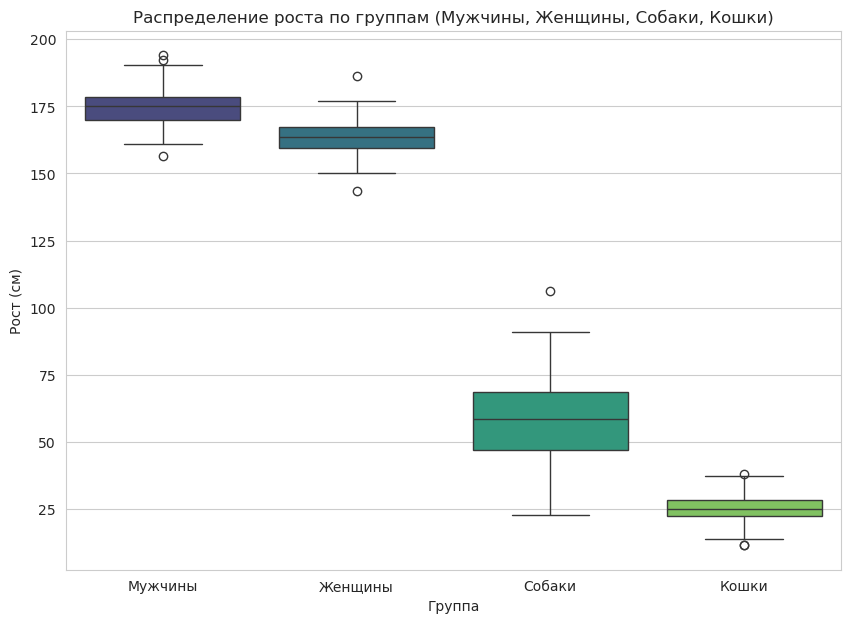



--- Box plot роста по группам и возрастным категориям ---


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_680893/2069368400.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Возраст_Категория', y='Рост', col='Группа', data=all_data_age,
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future 

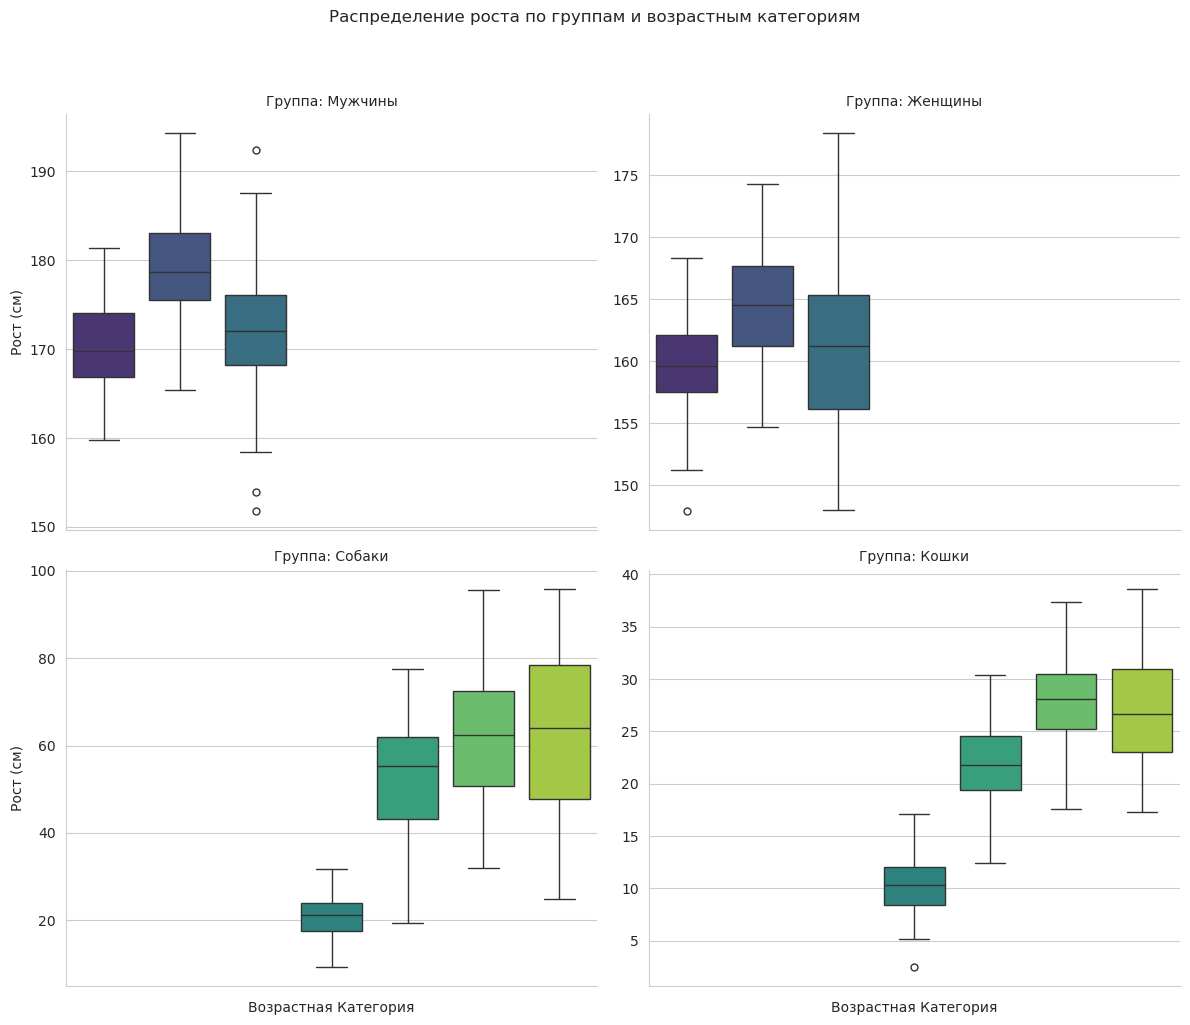



--- Violin Plot роста по группам и условное распределение по возрасту ---


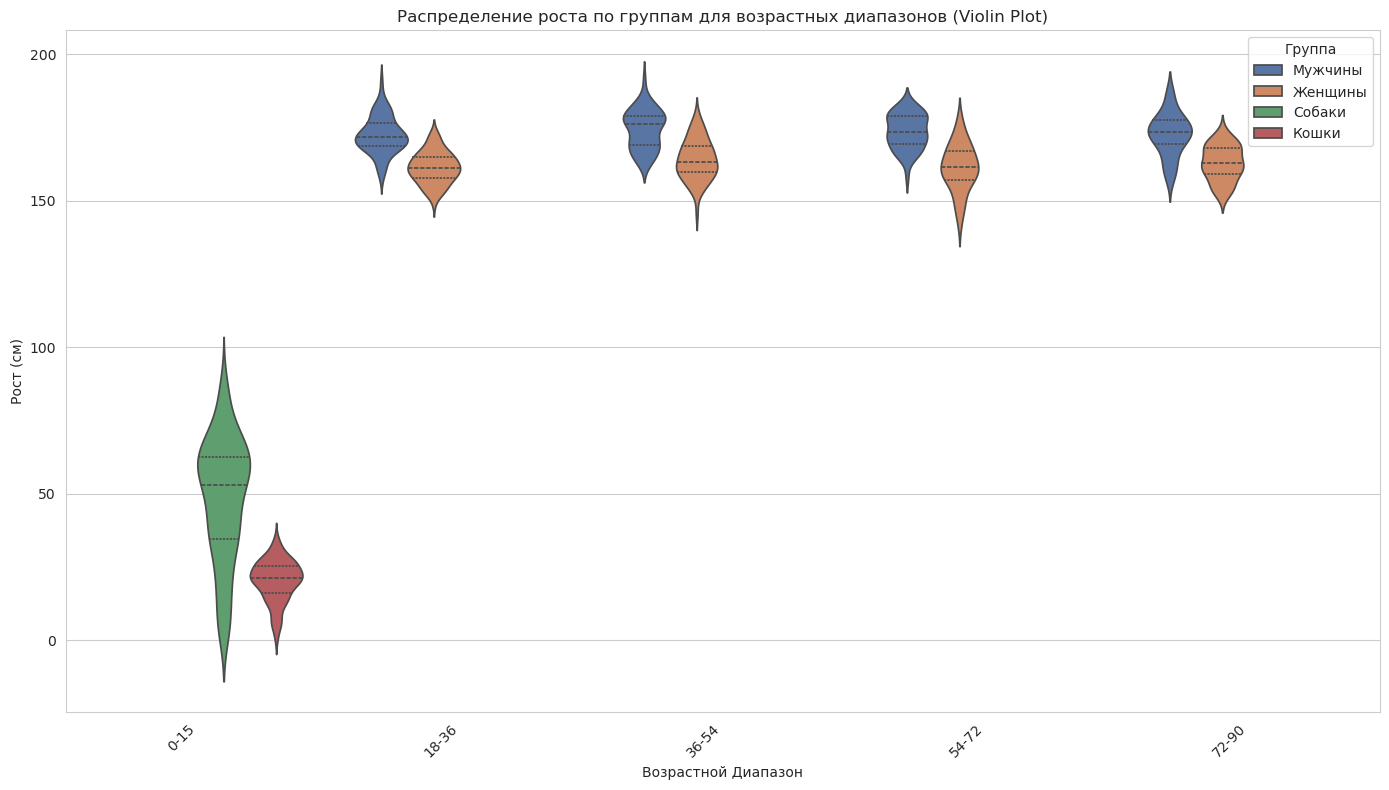

In [22]:
# Устанавливаем стиль для графиков
sns.set_style("whitegrid")

# --- Часть 1: Box plot для 4 групп по росту (без учета возраста напрямую) ---

print("--- Box plot для 4 групп по росту ---")

# 1. Генерация случайных данных для примера
np.random.seed(42)  # Для воспроизводимости результатов

# Высота (рост) в см или дюймах, в зависимости от контекста. Предположим см.
# Мужчины: среднее ~175 см, стд.откл ~7 см
men_height = np.random.normal(loc=175, scale=7, size=200)

# Женщины: среднее ~163 см, стд.откл ~6 см
women_height = np.random.normal(loc=163, scale=6, size=200)

# Собаки (например, средний рост в холке, крупные породы): среднее ~60 см, стд.откл ~15 см
# Возможны выбросы для карликовых или гигантских пород
dogs_height = np.random.normal(loc=60, scale=15, size=150)
dogs_height = np.maximum(dogs_height, 10)  # Высота не может быть слишком маленькой

# Кошки (средний рост в холке): среднее ~25 см, стд.откл ~5 см
cats_height = np.random.normal(loc=25, scale=5, size=180)
cats_height = np.maximum(cats_height, 5)  # Высота не может быть слишком маленькой

# 2. Объединение данных в DataFrame для удобства Seaborn
data_height = pd.DataFrame(
    {
        "Рост": np.concatenate([men_height, women_height, dogs_height, cats_height]),
        "Группа": ["Мужчины"] * len(men_height)
        + ["Женщины"] * len(women_height)
        + ["Собаки"] * len(dogs_height)
        + ["Кошки"] * len(cats_height),
    }
)

# 3. Построение Box Plot
plt.figure(figsize=(10, 7))
sns.boxplot(x="Группа", y="Рост", data=data_height, palette="viridis")
plt.title("Распределение роста по группам (Мужчины, Женщины, Собаки, Кошки)")
plt.xlabel("Группа")
plt.ylabel("Рост (см)")
plt.show()

print("\n" + "=" * 80 + "\n")

# --- Часть 2: Box plot с учетом "возраста" (через категоризацию) ---
# Если "возраст" должен влиять на распределение роста, нам нужно сгруппировать по возрасту.
# Мы создадим несколько возрастных категорий.

print("--- Box plot роста по группам и возрастным категориям ---")

# 1. Генерация данных с учетом возраста
np.random.seed(43)  # Новый seed

# Создадим более реалистичные данные для разных возрастных групп
# Люди
men_data = []
women_data = []

# Возрастные категории для людей
human_age_groups = ["Молодые (18-30)", "Взрослые (31-60)", "Пожилые (61+)"]
human_age_bins = [18, 31, 61, 100]  # Границы для генерации возраста

for i, age_group in enumerate(human_age_groups):
    if age_group == "Молодые (18-30)":
        mean_m, std_m = 170, 5  # Меньше среднего для молодых
        mean_w, std_w = 160, 4
        size_m, size_w = 70, 70
    elif age_group == "Взрослые (31-60)":
        mean_m, std_m = 178, 6  # Пик роста
        mean_w, std_w = 165, 5
        size_m, size_w = 100, 100
    else:  # Пожилые
        mean_m, std_m = 172, 7  # Снижение роста
        mean_w, std_w = 161, 6
        size_m, size_w = 50, 50

    men_data.extend(
        [
            {"Рост": h, "Группа": "Мужчины", "Возраст_Категория": age_group}
            for h in np.random.normal(loc=mean_m, scale=std_m, size=size_m)
        ]
    )
    women_data.extend(
        [
            {"Рост": h, "Группа": "Женщины", "Возраст_Категория": age_group}
            for h in np.random.normal(loc=mean_w, scale=std_w, size=size_w)
        ]
    )

# Животные (возрастные категории)
animal_age_groups = [
    "Щенки/Котята (0-1)",
    "Молодые (1-5)",
    "Взрослые (5-10)",
    "Пожилые (10+)",
]
animal_age_bins = [0, 1, 5, 10, 20]

dogs_data = []
cats_data = []

for i, age_group in enumerate(animal_age_groups):
    if age_group == "Щенки/Котята (0-1)":
        mean_d, std_d = 20, 5  # Низкий рост
        mean_c, std_c = 10, 3
        size_d, size_c = 60, 60
    elif age_group == "Молодые (1-5)":
        mean_d, std_d = 55, 12  # Активный рост
        mean_c, std_c = 22, 4
        size_d, size_c = 80, 80
    elif age_group == "Взрослые (5-10)":
        mean_d, std_d = 65, 15  # Пик роста
        mean_c, std_c = 28, 5
        size_d, size_c = 70, 70
    else:  # Пожилые (10+)
        mean_d, std_d = 63, 16  # Небольшое снижение/стабилизация
        mean_c, std_c = 27, 5
        size_d, size_c = 60, 60

    dogs_data.extend(
        [
            {"Рост": h, "Группа": "Собаки", "Возраст_Категория": age_group}
            for h in np.random.normal(loc=mean_d, scale=std_d, size=size_d)
        ]
    )
    cats_data.extend(
        [
            {"Рост": h, "Группа": "Кошки", "Возраст_Категория": age_group}
            for h in np.random.normal(loc=mean_c, scale=std_c, size=size_c)
        ]
    )

# Объединяем все данные в один DataFrame
all_data_age = pd.DataFrame(men_data + women_data + dogs_data + cats_data)
# Убедимся, что рост не отрицательный
all_data_age["Рост"] = np.maximum(all_data_age["Рост"], 0.1)

# Упорядочиваем категории для корректного отображения на графике
all_data_age["Возраст_Категория"] = pd.Categorical(
    all_data_age["Возраст_Категория"],
    categories=human_age_groups + animal_age_groups,
    ordered=True,
)
all_data_age["Группа"] = pd.Categorical(
    all_data_age["Группа"],
    categories=["Мужчины", "Женщины", "Собаки", "Кошки"],
    ordered=True,
)


# 2. Построение Box Plot с помощью FacetGrid для разделения по группам
g = sns.catplot(
    x="Возраст_Категория",
    y="Рост",
    col="Группа",
    data=all_data_age,
    kind="box",
    col_wrap=2,
    height=5,
    aspect=1.2,
    palette="viridis",
    sharey=False,
)  # sharey=False, т.к. диапазоны роста сильно отличаются

# Настройка заголовков фасетов и меток
g.set_axis_labels("Возрастная Категория", "Рост (см)")
g.set_titles("Группа: {col_name}")
g.set_xticklabels(rotation=45, ha="right")  # Поворот меток возраста для читаемости
plt.suptitle(
    "Распределение роста по группам и возрастным категориям", y=1.02
)  # Общий заголовок
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Регулировка макета
plt.show()

print("\n" + "=" * 80 + "\n")

# --- Часть 3: Альтернативный подход для сравнения роста по группам с учетом возраста ---
# Если возраст - это непрерывное значение, можно использовать Violin Plot или Scatter Plot с KDE.
# Violin Plot - это комбинация box plot и графика плотности ядра, которая показывает распределение данных.

print("--- Violin Plot роста по группам и условное распределение по возрасту ---")

# Для демонстрации Violin plot, создадим более сложный DataFrame, где возраст будет непрерывным.
# Используем данные из Части 2, но сделаем возраст непрерывным для части групп.
data_for_violin = []

# Для людей: пусть возраст будет непрерывным
for age_group_str, (min_age, max_age) in zip(
    human_age_groups, [(18, 30), (31, 60), (61, 90)]
):
    # Мужчины
    num_m = 100 if "Взрослые" in age_group_str else 60
    heights_m = np.random.normal(
        loc=(
            175
            if "Взрослые" in age_group_str
            else (170 if "Молодые" in age_group_str else 172)
        ),
        scale=7,
        size=num_m,
    )
    ages_m = np.random.uniform(min_age, max_age, num_m)
    for h, a in zip(heights_m, ages_m):
        data_for_violin.append({"Рост": max(0.1, h), "Группа": "Мужчины", "Возраст": a})

    # Женщины
    num_w = 100 if "Взрослые" in age_group_str else 60
    heights_w = np.random.normal(
        loc=(
            163
            if "Взрослые" in age_group_str
            else (160 if "Молодые" in age_group_str else 161)
        ),
        scale=6,
        size=num_w,
    )
    ages_w = np.random.uniform(min_age, max_age, num_w)
    for h, a in zip(heights_w, ages_w):
        data_for_violin.append({"Рост": max(0.1, h), "Группа": "Женщины", "Возраст": a})

# Для животных: сделаем возраст также непрерывным, но с другими диапазонами
for age_group_str, (min_age, max_age) in zip(
    animal_age_groups, [(0, 1), (1, 5), (5, 10), (10, 15)]
):
    # Собаки
    num_d = 80 if "Молодые" in age_group_str else 50
    heights_d = np.random.normal(
        loc=(
            60
            if "Взрослые" in age_group_str
            else (20 if "Щенки" in age_group_str else 55)
        ),
        scale=15,
        size=num_d,
    )
    ages_d = np.random.uniform(min_age, max_age, num_d)
    for h, a in zip(heights_d, ages_d):
        data_for_violin.append({"Рост": max(0.1, h), "Группа": "Собаки", "Возраст": a})

    # Кошки
    num_c = 80 if "Молодые" in age_group_str else 50
    heights_c = np.random.normal(
        loc=(
            25
            if "Взрослые" in age_group_str
            else (10 if "Котята" in age_group_str else 22)
        ),
        scale=5,
        size=num_c,
    )
    ages_c = np.random.uniform(min_age, max_age, num_c)
    for h, a in zip(heights_c, ages_c):
        data_for_violin.append({"Рост": max(0.1, h), "Группа": "Кошки", "Возраст": a})

df_violin = pd.DataFrame(data_for_violin)

# Создадим "bins" для возраста, чтобы показать распределение "по возрасту" на Violin Plot
# Разделим возраст на категории для построения Violin Plot
df_violin["Возраст_Бин"] = pd.cut(
    df_violin["Возраст"], bins=5, labels=False, include_lowest=True
)
df_violin["Возраст_Бин_Метки"] = df_violin.groupby("Возраст_Бин")["Возраст"].transform(
    lambda x: f"{x.min():.0f}-{x.max():.0f}"
)
df_violin["Возраст_Бин_Метки"] = pd.Categorical(
    df_violin["Возраст_Бин_Метки"], ordered=True
)


plt.figure(figsize=(14, 8))
sns.violinplot(
    x="Возраст_Бин_Метки",
    y="Рост",
    hue="Группа",
    data=df_violin,
    palette="deep",
    inner="quartile",
)  # inner='quartile' покажет медиану и квартили
plt.title("Распределение роста по группам для возрастных диапазонов (Violin Plot)")
plt.xlabel("Возрастной Диапазон")
plt.ylabel("Рост (см)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Группа")
plt.tight_layout()
plt.show()

In [29]:
# df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
HOME = "/home/jovyan/stat_examples"
data_dir = HOME + "/3_2"
df = pd.read_csv(data_dir + "/diabetes_012_health_indicators_BRFSS2015.csv")

df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [30]:
df.shape

(253680, 22)

In [33]:
df_sample = df.sample(1000)

print(df_sample.describe())

       Diabetes_012       HighBP     HighChol    CholCheck          BMI  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean       0.286000     0.418000     0.423000     0.965000    28.242000   
std        0.684597     0.493477     0.494283     0.183872     6.696139   
min        0.000000     0.000000     0.000000     0.000000    13.000000   
25%        0.000000     0.000000     0.000000     1.000000    24.000000   
50%        0.000000     0.000000     0.000000     1.000000    27.000000   
75%        0.000000     1.000000     1.000000     1.000000    31.000000   
max        2.000000     1.000000     1.000000     1.000000    89.000000   

            Smoker       Stroke  HeartDiseaseorAttack  PhysActivity  \
count  1000.000000  1000.000000           1000.000000   1000.000000   
mean      0.451000     0.038000              0.077000      0.778000   
std       0.497842     0.191292              0.266725      0.415799   
min       0.000000     0.000000         

In [35]:
for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [37]:
fa = Factor(df, n_factor=3, method="pa")

res = fa.fit()

In [38]:
res.get_loadings_frame(threshold=0.3)

,factor 0,factor 1,factor 2
GenHlth,-0.737669,-0.068634,0.109523
DiffWalk,-0.619598,-0.020068,0.190070
PhysHlth,-0.617161,-0.159663,0.386552
Income,0.538718,0.226002,0.227963
HighBP,-0.447299,0.363881,-0.104761
Education,0.424014,0.163657,0.361375
Diabetes_012,-0.400204,0.189760,-0.042026
PhysActivity,0.367441,0.081766,0.083452
MentHlth,-0.354017,-0.290727,0.206318
HeartDiseaseorAttack,-0.352930,0.205995,0.002117


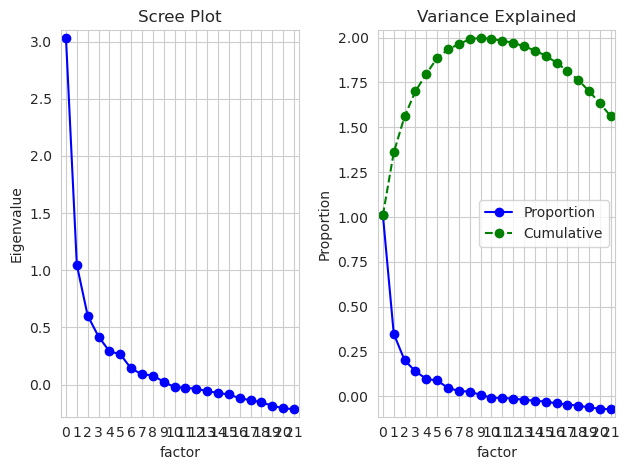

In [39]:
res.plot_scree()

plt.show()

In [ ]:
# 7. Сбор и обработка данных

In [41]:
HOME = "/home/jovyan/stat_examples"
data_dir = HOME + "/3_2"
imdb_films = pd.read_csv(data_dir + "/imdb.csv")

print(imdb_films.head(10))

   number                                              title  year  rating
0     1.0                           The Shawshank Redemption -1994     9.3
1     2.0                                      The Godfather -1972     9.2
2     3.0                                    The Dark Knight -2008     9.0
3     4.0                              The Godfather Part II -1974     9.0
4     5.0                                       12 Angry Men -1957     9.0
5     6.0                                   Schindler's List -1993     9.0
6     7.0      The Lord of the Rings: The Return of the King -2003     9.0
7     8.0                                       Pulp Fiction -1994     8.9
8     9.0  The Lord of the Rings: The Fellowship of the Ring -2001     8.8
9    10.0                     The Good, the Bad and the Ugly -1966     8.8


In [ ]:
HOME = "/home/jovyan/stat_examples"
data_dir = HOME + "/3_2"
df = pd.read_csv(data_dir + "/diabetes_012_health_indicators_BRFSS2015.csv")

In [43]:
HOME = "/home/jovyan/stat_examples"
data_dir = HOME + "/3_2"

imdb_series = pd.read_csv(data_dir + "/imdb_series_original.csv")

print(imdb_series.head(10))

                                   posterColumn href  \
0  https://www.imdb.com/title/tt5491994/?pf_rd_m=...   
1  https://www.imdb.com/title/tt0903747/?pf_rd_m=...   
2  https://www.imdb.com/title/tt0795176/?pf_rd_m=...   
3  https://www.imdb.com/title/tt0185906/?pf_rd_m=...   
4  https://www.imdb.com/title/tt7366338/?pf_rd_m=...   
5  https://www.imdb.com/title/tt0306414/?pf_rd_m=...   
6  https://www.imdb.com/title/tt0417299/?pf_rd_m=...   
7  https://www.imdb.com/title/tt6769208/?pf_rd_m=...   
8  https://www.imdb.com/title/tt0141842/?pf_rd_m=...   
9  https://www.imdb.com/title/tt2395695/?pf_rd_m=...   

                                    posterColumn src  titleColumn  \
0  https://m.media-amazon.com/images/M/MV5BMGZmYm...          1.0   
1  https://m.media-amazon.com/images/M/MV5BYmQ4YW...          2.0   
2  https://m.media-amazon.com/images/M/MV5BMzMyYj...          3.0   
3  https://m.media-amazon.com/images/M/MV5BMTI3OD...          4.0   
4  https://m.media-amazon.com/images/M

In [44]:
print(imdb_films.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   number  250 non-null    float64
 1   title   250 non-null    object 
 2   year    250 non-null    int64  
 3   rating  250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB
None


In [45]:
cols = ["year"]

imdb_films[cols] = imdb_films[cols].abs()

print(imdb_films.head())

   number                     title  year  rating
0     1.0  The Shawshank Redemption  1994     9.3
1     2.0             The Godfather  1972     9.2
2     3.0           The Dark Knight  2008     9.0
3     4.0     The Godfather Part II  1974     9.0
4     5.0              12 Angry Men  1957     9.0


In [47]:
HOME = "/home/jovyan/stat_examples"
data_dir = HOME + "/3_2"

imdb_series = pd.read_csv(data_dir + "/imdb_series_original.csv")

print(imdb_series)

                                     posterColumn href  \
0    https://www.imdb.com/title/tt5491994/?pf_rd_m=...   
1    https://www.imdb.com/title/tt0903747/?pf_rd_m=...   
2    https://www.imdb.com/title/tt0795176/?pf_rd_m=...   
3    https://www.imdb.com/title/tt0185906/?pf_rd_m=...   
4    https://www.imdb.com/title/tt7366338/?pf_rd_m=...   
..                                                 ...   
245  https://www.imdb.com/title/tt0310455/?pf_rd_m=...   
246  https://www.imdb.com/title/tt2937900/?pf_rd_m=...   
247  https://www.imdb.com/title/tt0262150/?pf_rd_m=...   
248  https://www.imdb.com/title/tt7259746/?pf_rd_m=...   
249  https://www.imdb.com/title/tt6958022/?pf_rd_m=...   

                                      posterColumn src  titleColumn  \
0    https://m.media-amazon.com/images/M/MV5BMGZmYm...          1.0   
1    https://m.media-amazon.com/images/M/MV5BYmQ4YW...          2.0   
2    https://m.media-amazon.com/images/M/MV5BMzMyYj...          3.0   
3    https://m.medi

In [49]:
# imdb_series.drop('titleColumn href', axis='columns', inplace=True)

print(imdb_series)

                                     posterColumn href  \
0    https://www.imdb.com/title/tt5491994/?pf_rd_m=...   
1    https://www.imdb.com/title/tt0903747/?pf_rd_m=...   
2    https://www.imdb.com/title/tt0795176/?pf_rd_m=...   
3    https://www.imdb.com/title/tt0185906/?pf_rd_m=...   
4    https://www.imdb.com/title/tt7366338/?pf_rd_m=...   
..                                                 ...   
245  https://www.imdb.com/title/tt0310455/?pf_rd_m=...   
246  https://www.imdb.com/title/tt2937900/?pf_rd_m=...   
247  https://www.imdb.com/title/tt0262150/?pf_rd_m=...   
248  https://www.imdb.com/title/tt7259746/?pf_rd_m=...   
249  https://www.imdb.com/title/tt6958022/?pf_rd_m=...   

                                      posterColumn src  titleColumn  \
0    https://m.media-amazon.com/images/M/MV5BMGZmYm...          1.0   
1    https://m.media-amazon.com/images/M/MV5BYmQ4YW...          2.0   
2    https://m.media-amazon.com/images/M/MV5BMzMyYj...          3.0   
3    https://m.medi

In [50]:
imdb_series.rename(
    columns={
        "titleColumn": "Number",
        "titleColumn 2": "Title",
        "secondaryInfo": "Year",
        "ratingColumn": "Rating",
    },
    inplace=True,
)

print(imdb_series)

                                     posterColumn href  \
0    https://www.imdb.com/title/tt5491994/?pf_rd_m=...   
1    https://www.imdb.com/title/tt0903747/?pf_rd_m=...   
2    https://www.imdb.com/title/tt0795176/?pf_rd_m=...   
3    https://www.imdb.com/title/tt0185906/?pf_rd_m=...   
4    https://www.imdb.com/title/tt7366338/?pf_rd_m=...   
..                                                 ...   
245  https://www.imdb.com/title/tt0310455/?pf_rd_m=...   
246  https://www.imdb.com/title/tt2937900/?pf_rd_m=...   
247  https://www.imdb.com/title/tt0262150/?pf_rd_m=...   
248  https://www.imdb.com/title/tt7259746/?pf_rd_m=...   
249  https://www.imdb.com/title/tt6958022/?pf_rd_m=...   

                                      posterColumn src  Number  \
0    https://m.media-amazon.com/images/M/MV5BMGZmYm...     1.0   
1    https://m.media-amazon.com/images/M/MV5BYmQ4YW...     2.0   
2    https://m.media-amazon.com/images/M/MV5BMzMyYj...     3.0   
3    https://m.media-amazon.com/images/

In [51]:
imdb_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   posterColumn href  250 non-null    object 
 1   posterColumn src   250 non-null    object 
 2   Number             250 non-null    float64
 3   Title              250 non-null    object 
 4   Year               250 non-null    object 
 5   Rating             250 non-null    float64
dtypes: float64(2), object(4)
memory usage: 11.8+ KB


In [52]:
imdb_series.head()

,posterColumn href,posterColumn src,Number,Title,Year,Rating
0,https://www.imdb.com/title/tt5491994/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BMGZmYm...,1.0,Planet Earth II,(2016),9.4
1,https://www.imdb.com/title/tt0903747/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,2.0,Breaking Bad,(2008),9.4
2,https://www.imdb.com/title/tt0795176/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BMzMyYj...,3.0,Planet Earth,(2006),9.4
3,https://www.imdb.com/title/tt0185906/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BMTI3OD...,4.0,Band of Brothers,(2001),9.4
4,https://www.imdb.com/title/tt7366338/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BNTdkN2...,5.0,Chernobyl,(2019),9.3


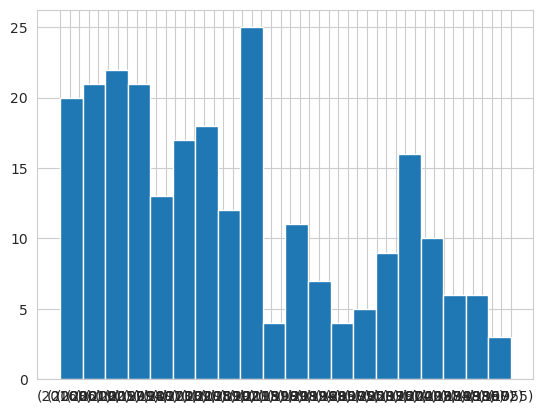

In [53]:
imdb_series["Year"].hist(bins=20)

plt.show()

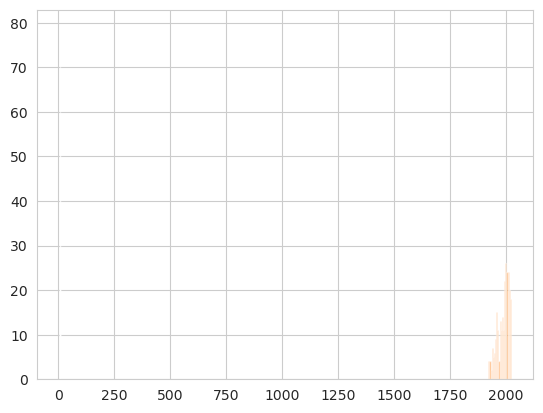

In [56]:
imdb_series["Rating"].hist(bins=20, alpha=0.5)

imdb_films["year"].hist(bins=20, alpha=0.5)

plt.show()

In [57]:
HOME = "/home/jovyan/stat_examples"
data_dir = HOME + "/3_2"

df = pd.read_csv(data_dir + "/islander_data.csv")

In [58]:
exp_sample = df.sample(n=100)

print(exp_sample)

    first_name  last_name  age Happy_Sad_group  Dosage Drug  Mem_Score_Before  \
99         Rok      Hajek   48               H       2    S              48.3   
37        Jose      Lopez   25               H       2    A              50.0   
75      Robert     Durand   45               S       1    S              45.8   
55      Daichi   Gonzalez   68               H       3    A              41.9   
9         Mark     Durand   36               S       1    A              54.8   
..         ...        ...  ...             ...     ...  ...               ...   
90     Ignacio   Carrasco   46               H       2    S              54.8   
121     Takumi     Durand   44               S       3    S              53.6   
193      Jacob      Novak   52               H       3    T              71.3   
108        Aya  Takahashi   37               S       2    S              76.3   
35       Ayano    Kennedy   38               H       2    A              40.2   

     Mem_Score_After  Diff 

In [59]:
exp_sample = df.groupby("Drug").sample(30)

print(exp_sample.value_counts("Drug"))

Drug
A    30
S    30
T    30
Name: count, dtype: int64


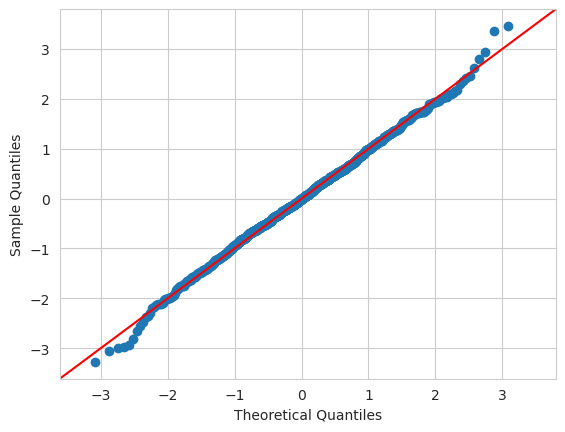

In [60]:
normal_data = np.random.normal(0, 1, 1000)


sm.qqplot(normal_data, line="45")

plt.show()

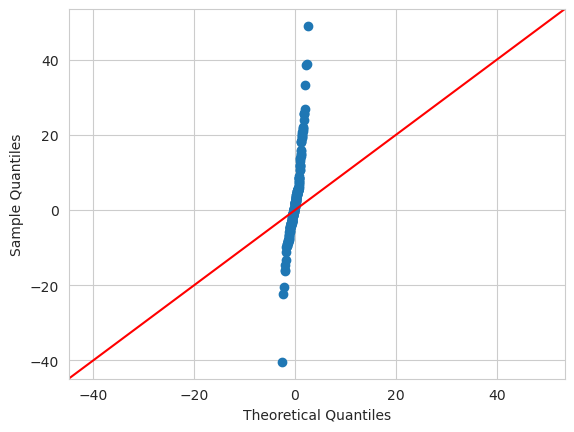

In [61]:
sm.qqplot(df["Diff"], line="45")

plt.show()

<Axes: title={'center': 'Diff'}, xlabel='Happy_Sad_group'>

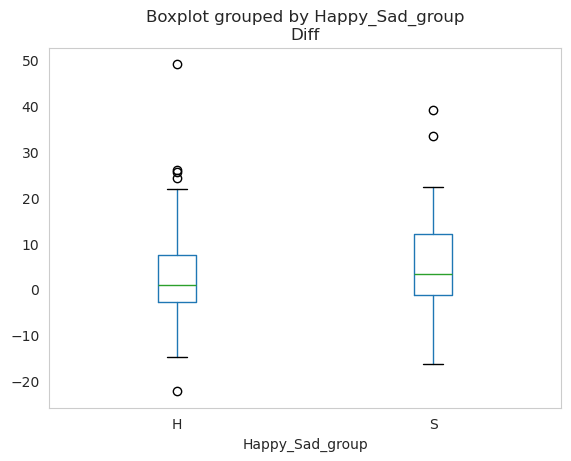

In [63]:
# график состоит из медианы, коробки, усов и аутлаеров. Коробка — это прямоугольник,
# который отражает первый и третий квартиль распределения, что примерно равно 68% процентов распределения. Усы показывают диапазон распределения 95% результатов

exp_sample.boxplot(by="Happy_Sad_group", column=["Diff"], grid=False)

(<Figure size 640x480 with 3 Axes>,
 {('1', 'S'): (0.0, 0.0, 0.31903190319031904, 0.412418375529843),
  ('1', 'H'): (0.0,
   0.41574063466605565,
   0.31903190319031904,
   0.5842593653339443),
  ('3', 'S'): (0.323982398239824, 0.0, 0.308030803080308, 0.3559563360227812),
  ('3', 'H'): (0.323982398239824,
   0.35927859515899385,
   0.308030803080308,
   0.640721404841006),
  ('2', 'S'): (0.6369636963696369,
   0.0,
   0.36303630363036304,
   0.4832376925400181),
  ('2', 'H'): (0.6369636963696369,
   0.48655995167623073,
   0.36303630363036304,
   0.5134400483237692)})

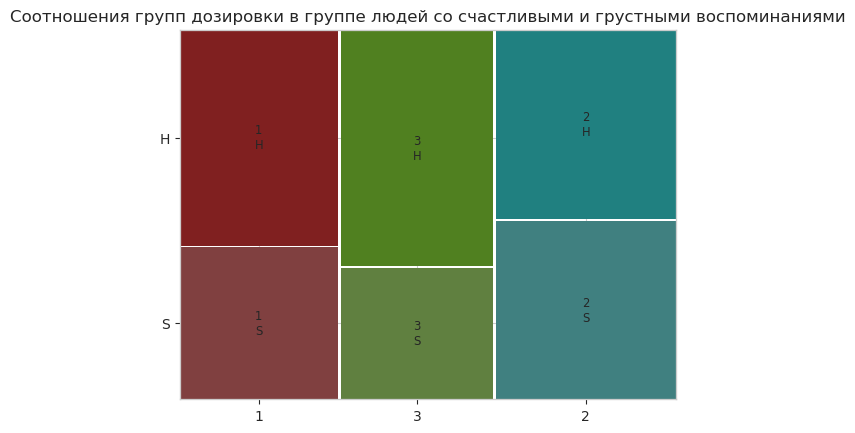

In [64]:
mosaic(
    exp_sample,
    ["Dosage", "Happy_Sad_group"],
    title="Соотношения групп дозировки в группе людей со счастливыми и грустными воспоминаниями",
)

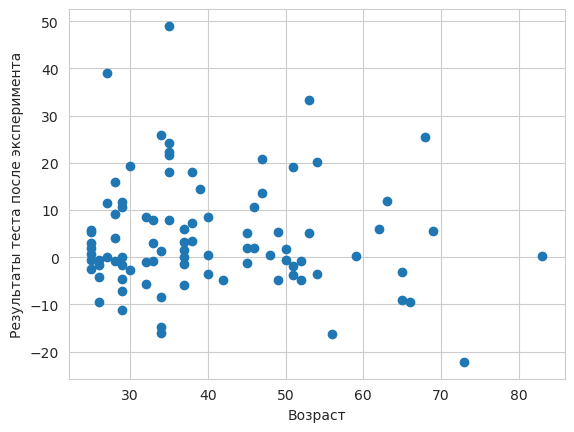

In [65]:
plt.scatter(exp_sample["age"], exp_sample["Diff"])

plt.xlabel("Возраст")

plt.ylabel("Результаты теста после эксперимента")

plt.show()

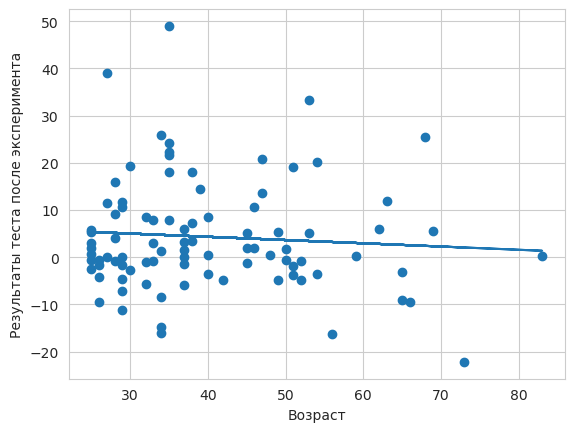

In [66]:
plt.scatter(exp_sample["age"], exp_sample["Diff"])
plt.xlabel("Возраст")
plt.ylabel("Результаты теста после эксперимента")
k, b = np.polyfit(exp_sample["age"], exp_sample["Diff"], 1)
plt.plot(exp_sample["age"], k * exp_sample["age"] + b)

In [67]:
np.corrcoef(exp_sample["age"], exp_sample["Diff"])[0, 1]
0.06431149195434109

0.06431149195434109

2. Код заданий

7.769
2.853
5.407096153846155
5.407096153846155
5.208
1.1131198687956712
['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria']
141.203
13.87
Jeff Kinney
4.56
4.65
0.1
0.0
0.3
object
0         Good
1    Excellent
2    Very Poor
3    Very Poor
4         Good
Name: Rating of Online Class experience, dtype: object
529
float64
0.24977164627176776
0.008007326080940923
Health issue during lockdown
0    1021
1     161
Name: count, dtype: int64
85
2.91
Talklife 10.0


C:\Users\vboxuser\AppData\Local\Temp\ipykernel_5932\758886690.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Time spent on TV"].replace(["No tv", "N", "n", " "], 0, inplace=True)
C:\Users\vboxuser\AppData\Local\Temp\ipykernel_5932\758886690.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
4
V119 V120 V121 V122 V123
V108 V109 V117 V118
V117


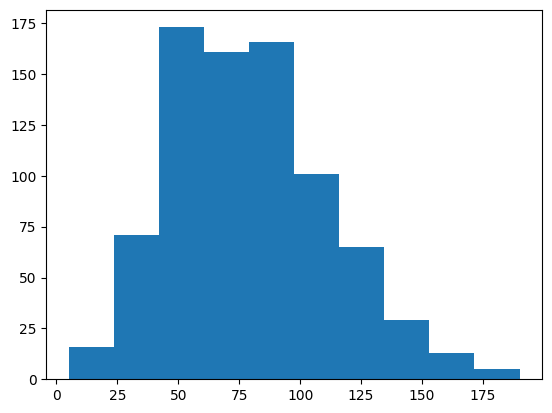

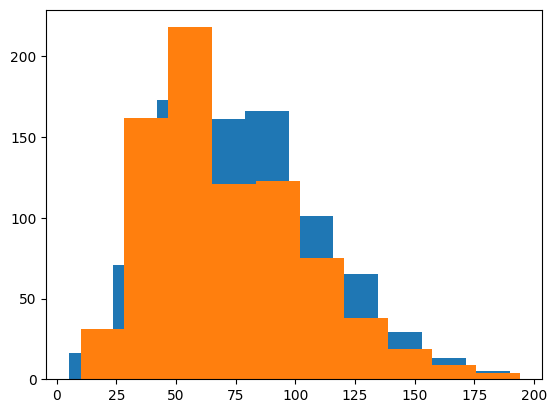

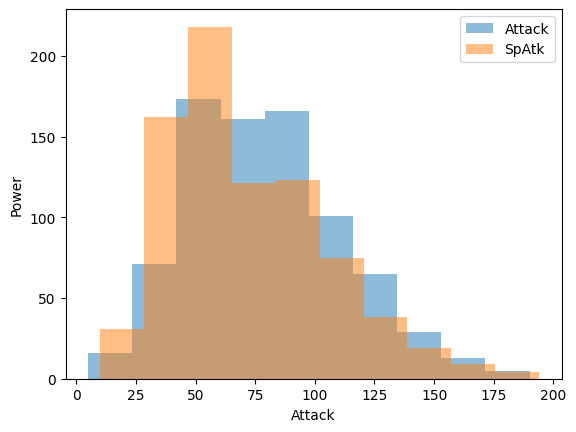

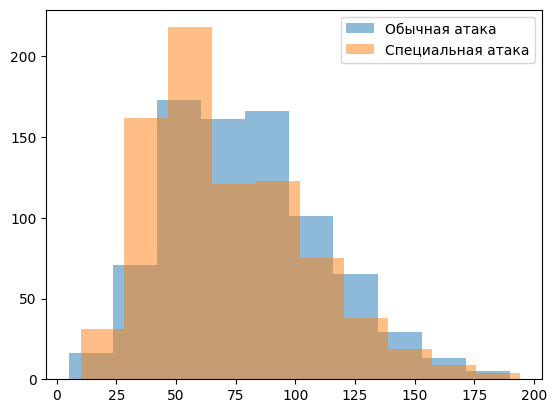

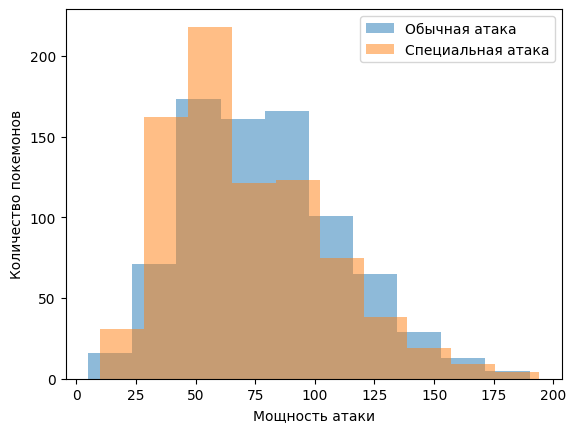

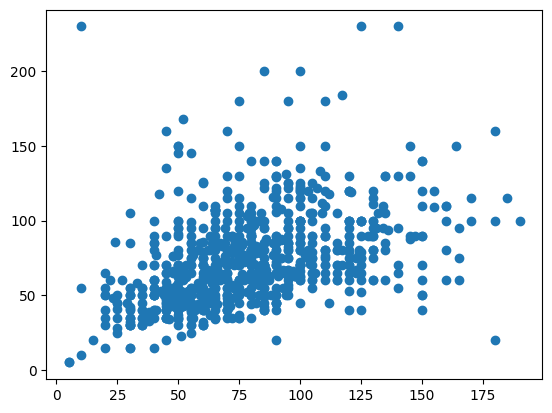

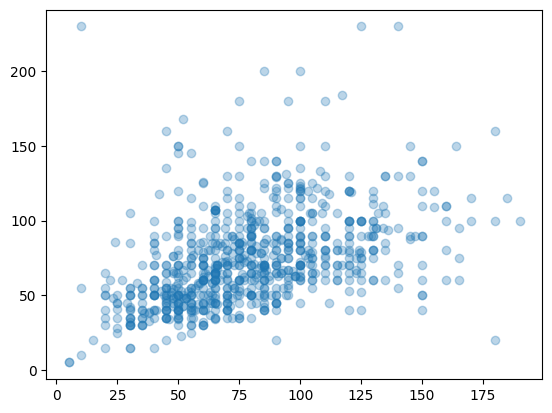

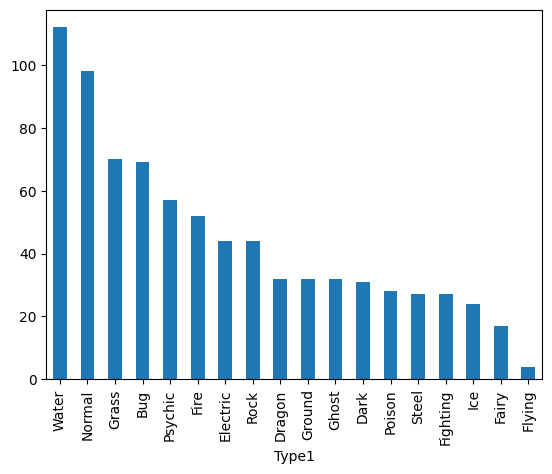

<Figure size 640x480 with 0 Axes>

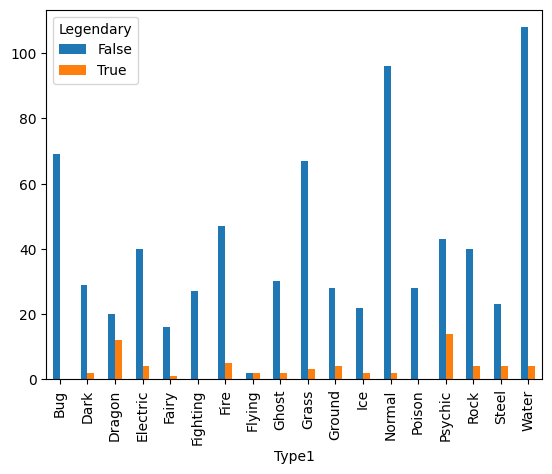

<Figure size 640x480 with 0 Axes>

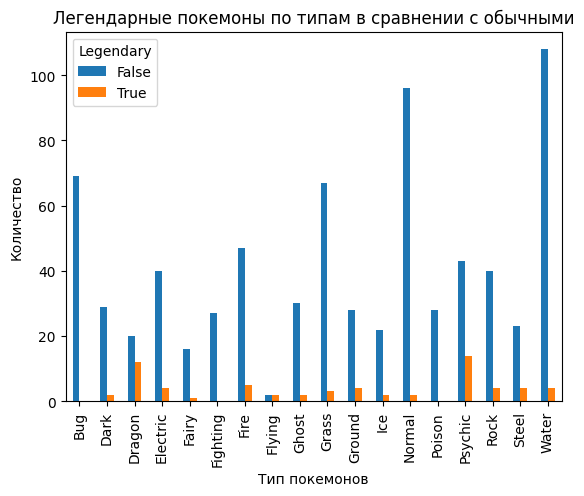

In [ ]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup, Tag
from scipy.stats import chi2_contingency, f_oneway, levene, ttest_ind


def chapter_2() -> None:
    """Analyze happiness scores and GDP data from 2019 dataset."""
    df = pd.read_csv("./2019.csv")

    print(df["Score"].max())
    print(df["Score"].min())
    print(df["Score"].mean())

    mean_by_country = df.groupby("Country or region")["Score"].mean().mean()
    print(mean_by_country)

    print(df["Score"].mode()[0])
    print(df["Score"].std())

    top10 = df.sort_values(by="Score", ascending=False).head(10)
    print(top10["Country or region"].to_list())

    print(df["GDP per capita"].sum())
    print(top10["GDP per capita"].sum())

chapter_2()


def chapter_3() -> None:
    """Analyze book ratings and prices, perform statistical tests."""
    df = pd.read_csv("./books_prep.csv")

    print(df["Author"].describe()["top"])

    grp = df.groupby("Price (Above Average)")["User Rating"]
    print(grp.mean().round(2)["Yes"])
    print(grp.mean().round(2)["No"])

    exp = df[df["Price (Above Average)"] == "Yes"]["User Rating"]
    cheap = df[df["Price (Above Average)"] == "No"]["User Rating"]

    lev_result = levene(exp, cheap)
    print(round(lev_result[1], 2))

    ttest_result = ttest_ind(exp, cheap, equal_var=True)
    print(round(ttest_result[1], 2))

    r5 = df[df["User Rating (Round)"] == 5]["Reviews"]
    r4 = df[df["User Rating (Round)"] == 4]["Reviews"]
    r3 = df[df["User Rating (Round)"] == 3]["Reviews"]

    anova_result = f_oneway(r5, r4, r3)
    print(round(anova_result[1], 2))

chapter_3()


def chapter_4() -> None:
    """Analyze COVID-19 survey responses about online classes and lifestyle."""
    df = pd.read_csv("./COVID-19 SSR.csv")
    print(df.dtypes.mode()[0])
    df["Rating of Online Class experience"] = df[
        "Rating of Online Class experience"
    ].str.title()
    print(df["Rating of Online Class experience"].head())
    df = pd.read_csv("./COVID-19 Survey Student Responses.csv")
    df["Sleep"] = np.where(
        (df["Time spent on sleep"] > 6.9) & (df["Time spent on sleep"] < 9),
        "normal",
        "not normal",
    )
    print(len(df[df["Sleep"] == "not normal"]))
    df["Time spent on TV"].replace(["No tv", "N", "n", " "], 0, inplace=True)
    df["Time spent on TV"] = pd.to_numeric(df["Time spent on TV"])
    print(df["Time spent on TV"].dtype)
    df["Media"] = np.where(
        (df["Time spent on social media"] < 2), "normal", "not normal"
    )
    contingency_table = pd.crosstab(df["Sleep"], df["Media"])
    
    # 4. Проведение хи-квадрат теста
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(chi2)

    df["Sleep"] = np.where(df["Time spent on sleep"] > 7, "normal", "not normal")
    contingency_table = pd.crosstab(df["Sleep"], df["Media"])
    
    # 4. Проведение хи-квадрат теста
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(p_value)

    df["Health issue during lockdown"].replace(["YES", "NO"], [1, 0], inplace=True)
    print(df["Health issue during lockdown"].value_counts())

    print(len(df[df["Stress busters"].str.contains("book")]))

    most_popular_platform = df["Preferred social media platform"].mode()[0]

    filtered_df = df[df["Preferred social media platform"] == most_popular_platform]

    average_time = round(filtered_df["Time spent on social media"].mean(), 2)

    print(average_time)

    most_spend_time_platform = (
        df.groupby(by="Preferred social media platform")["Time spent on social media"]
        .mean()
        .sort_values(ascending=False)
    )

    print(most_spend_time_platform.index[0], most_spend_time_platform.values[0])

# chapter_4()


def chapter_5_1() -> None:
    """Create histogram of Pokemon Attack stats."""
    data = pd.read_csv("PokemonData.csv")

    plt.figure()
    plt.hist(data["Attack"])

    plt.savefig("result.png")


def chapter_5_2() -> None:
    """Create overlapping histograms of Attack and SpAtk stats."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    plt.hist(data["Attack"])
    plt.hist(data["SpAtk"])

    plt.savefig("result.png")


def chapter_5_3() -> None:
    """Create labeled histograms with legend and axis labels."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    plt.hist(data["Attack"], alpha=0.5, label="Attack")
    plt.hist(data["SpAtk"], alpha=0.5, label="SpAtk")
    plt.legend()
    plt.xlabel("Attack")
    plt.ylabel("Power")

    plt.savefig("result.png")


def chapter_5_4() -> None:
    """Create histograms with Russian labels."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    plt.hist(data["Attack"], alpha=0.5, label="Обычная атака")
    plt.hist(data["SpAtk"], alpha=0.5, label="Специальная атака")
    plt.legend()

    plt.savefig("result.png")


def chapter_5_5() -> None:
    """Create histograms with complete Russian labeling."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    plt.hist(data["Attack"], alpha=0.5, label="Обычная атака")
    plt.hist(data["SpAtk"], alpha=0.5, label="Специальная атака")
    plt.legend()
    plt.xlabel("Мощность атаки")
    plt.ylabel("Количество покемонов")

    plt.savefig("result.png")


def chapter_5_6() -> None:
    """Create scatter plot of Attack vs Defense."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    plt.scatter(data["Attack"], data["Defense"])
    plt.savefig("result.png")


def chapter_5_7() -> None:
    """Create transparent scatter plot of Attack vs Defense."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    plt.scatter(data["Attack"], data["Defense"], alpha=0.3)
    plt.savefig("result.png")


def chapter_5_8() -> None:
    """Create bar plot of Pokemon types distribution."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    data["Type1"].value_counts().plot(kind="bar")
    plt.savefig("result.png")


def chapter_5_9() -> None:
    """Create grouped bar plot comparing legendary vs normal Pokemon types."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    data.groupby("Legendary")["Type1"].value_counts().unstack(0).plot(kind="bar")
    plt.savefig("result.png")


def chapter_5_10() -> None:
    """Create fully labeled grouped bar plot comparing Pokemon types."""
    data = pd.read_csv("PokemonData.csv")
    plt.figure()
    data.groupby("Legendary")["Type1"].value_counts().unstack(0).plot(kind="bar")
    plt.xlabel("Тип покемонов")
    plt.title("Легендарные покемоны по типам в сравнении с обычными")
    plt.ylabel("Количество")
    plt.savefig("result.png")

chapter_5_1()
chapter_5_2()
chapter_5_3()
chapter_5_4()
chapter_5_5()
chapter_5_6()
chapter_5_7()
chapter_5_8()
chapter_5_9()
chapter_5_10()


def chapter_6() -> None:
    """Analyze World Values Survey data."""
    df = pd.read_csv("WVSW_6_2010_2014.csv")

    print(df.dtypes)
    print(4)
    print("V119", "V120", "V121", "V122", "V123")
    print("V108", "V109", "V117", "V118")
    print("V117")

chapter_6()

In [6]:
def chapter_7() -> None:
    """Parse and extract information from Kinopoisk HTML page."""
    with open("kinopoisk.html", encoding="utf-8") as file:
        html = file.read()
    soup = BeautifulSoup(html, "html.parser")
    if soup.title and isinstance(soup.title.text, str):
        title_text = soup.title.text
        print(title_text)
        print(title_text.strip().split("—")[0].strip())

    all_links = soup.find_all("a")

    directors = []
    for link in all_links:
        if isinstance(link, Tag):
            href = link.get("href", "")
            if href and "/name/" in href:
                directors.append(link.text.strip())

    if directors:
        print(directors[0])

    description_tag = soup.find("meta", attrs={"name": "description"})

    if description_tag and isinstance(description_tag, Tag):
        description = description_tag.get("content")
        if isinstance(description, str):
            description = description.strip()
            print(description)

            capitalized_words = re.findall(r"[А-ЯЁ][а-яё]+", description)

            for word in capitalized_words:
                print(word)

    actors = soup.find_all(
        "li",
        class_="styles_root__vKDSE styles_rootInLight__EFZzH",
    )

    print(len(actors))

    for actor in actors:
        if isinstance(actor.text, str):
            print(actor.text)

    a_tags = soup.find_all("a")

    print(len(a_tags))

    for tag in a_tags:
        if isinstance(tag, Tag):
            href = tag.get("href")
            if isinstance(href, str):
                print(href)


chapter_7()


def chapter_8() -> None:
    """Process and clean Disney titles dataset."""
    data = pd.read_csv("disney_title.csv")
    data.info()
    data["Date"] = pd.to_datetime(data["Date"])
    print(data["Date"].dtype)

    filtered = data[(data["Date"] >= "2020-01-01") & (data["Date"] < "2021-01-01")]

    print(filtered["title"].head(10))

    removed_data = data.drop(labels="release_year", axis=1)
    print(list(removed_data))

    renamed_data = data.copy()
    renamed_data.columns = pd.Index([cl.capitalize() for cl in renamed_data.columns])
    print(list(renamed_data.columns))

    new_listed_in = data["listed_in"].str.replace(" &", ",", regex=False)

    print(new_listed_in.tail())

    missing_values_count = data.isnull().sum()
    print(missing_values_count)

    data_cleaned = data.dropna()

    print(data_cleaned.isnull().sum())

    missing_percentage = (data.isnull().sum() / len(data)) * 100

    missing_percentage_rounded = missing_percentage.round(2)

    print(missing_percentage_rounded)

    data["country"] = data["country"].fillna("Country not specified")

    print(data["country"].head())


chapter_8()

Аватар: Путь воды (2022) — Кинопоиск
Аватар: Путь воды (2022)
Джеймс Кэмерон
После принятия образа аватара солдат Джейк Салли становится предводителем народа на'ви и берет на себя миссию по защите новых друзей от корыстных бизнесменов с Земли. Теперь ему есть за кого бороться — с Джейком его прекрасная возлюбленная Нейтири. Когда на Пандору возвращаются до зубов вооруженные земляне, Джейк готов дать им отпор.
После
Джейк
Салли
Земли
Теперь
Джейком
Нейтири
Когда
Пандору
Джейк
15
Сэм Уортингтон
Зои Салдана
Сигурни Уивер
Стивен Лэнг
Кейт Уинслет
Клифф Кёртис
Джоэль Мур
Си Си Эйч Паундер
Иди Фалько
Брендан Коуэлл
Александр Ноткин
Виктория Павленко
Карина Кудекова
Денис Анников
Ольга Бобрик
99
/
https://hd.kinopoisk.ru/
/lists/categories/movies/1/
/lists/categories/movies/3/
/afisha/new/
/media/
/
https://hd.kinopoisk.ru/
https://www.kinopoisk.ru/special/smarttv_instruction?utm_source=kinopoisk&utm_medium=selfpromo_kp&utm_campaign=button_header
/s/
https://hd.kinopoisk.ru/?source=kinopoisk_